In [4]:
%pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNet, EfficientNetB0
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Paths
dataset_path = "D:/Myproject5/Fish Classification/Data/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data"
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')
val_dir = os.path.join(dataset_path, 'val')

# Image Parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Build CNN Model
def create_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Compile and Train Base CNN
num_classes = train_generator.num_classes
cnn_model = create_cnn((IMG_HEIGHT, IMG_WIDTH, 3), num_classes)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('models/best_cnn_model.h5', save_best_only=True)
]

history = cnn_model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=callbacks
)

# Evaluate and Save Model
loss, acc = cnn_model.evaluate(test_generator)
print("Test Accuracy:", acc)

cnn_model.save('models/final_cnn_model.h5')


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


d:\Myproject5\Demo\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Myproject5\Demo\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2626 - loss: 2.4757

195/195 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.2630 - loss: 2.4729 - val_accuracy: 0.6172 - val_loss: 1.2953
Epoch 2/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4818 - loss: 1.4195

195/195 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.4819 - loss: 1.4193 - val_accuracy: 0.5659 - val_loss: 1.2143
Epoch 3/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5561 - loss: 1.2502

195/195 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.5562 - loss: 1.2499 - val_accuracy: 0.7518 - val_loss: 0.7661
Epoch 4/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6372 - loss: 1.0168

195/195 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.6372 - loss: 1.0168 - val_accuracy: 0.8233 - val_loss: 0.5827
Epoch 5/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.6836 - loss: 0.8889 - val_accuracy: 0.7766 - val_loss: 0.6321
Epoch 6/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7005 - loss: 0.8613

195/195 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.7005 - loss: 0.8612 - val_accuracy: 0.8718 - val_loss: 0.4756
Epoch 7/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 173s 887ms/step - accuracy: 0.7305 - loss: 0.7623 - val_accuracy: 0.8260 - val_loss: 0.5217
Epoch 8/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 889ms/step - accuracy: 0.7564 - loss: 0.7037

195/195 ━━━━━━━━━━━━━━━━━━━━ 182s 934ms/step - accuracy: 0.7563 - loss: 0.7036 - val_accuracy: 0.8617 - val_loss: 0.4424
Epoch 9/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.7626 - loss: 0.6636

195/195 ━━━━━━━━━━━━━━━━━━━━ 182s 930ms/step - accuracy: 0.7626 - loss: 0.6637 - val_accuracy: 0.8681 - val_loss: 0.4132
Epoch 10/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 892ms/step - accuracy: 0.7807 - loss: 0.6298

195/195 ━━━━━━━━━━━━━━━━━━━━ 183s 937ms/step - accuracy: 0.7807 - loss: 0.6297 - val_accuracy: 0.9212 - val_loss: 0.3137
Epoch 11/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.7988 - loss: 0.5750

195/195 ━━━━━━━━━━━━━━━━━━━━ 183s 938ms/step - accuracy: 0.7989 - loss: 0.5750 - val_accuracy: 0.9203 - val_loss: 0.2995
Epoch 12/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 901ms/step - accuracy: 0.7940 - loss: 0.5675

195/195 ━━━━━━━━━━━━━━━━━━━━ 184s 944ms/step - accuracy: 0.7940 - loss: 0.5675 - val_accuracy: 0.9103 - val_loss: 0.2969
Epoch 13/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.8239 - loss: 0.5240

195/195 ━━━━━━━━━━━━━━━━━━━━ 183s 939ms/step - accuracy: 0.8239 - loss: 0.5239 - val_accuracy: 0.9432 - val_loss: 0.2347
Epoch 14/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.8238 - loss: 0.4938

195/195 ━━━━━━━━━━━━━━━━━━━━ 126s 641ms/step - accuracy: 0.8239 - loss: 0.4937 - val_accuracy: 0.9332 - val_loss: 0.2272
Epoch 15/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 133s 680ms/step - accuracy: 0.8429 - loss: 0.4419 - val_accuracy: 0.7875 - val_loss: 0.5874
Epoch 16/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 151s 773ms/step - accuracy: 0.8202 - loss: 0.5004 - val_accuracy: 0.9386 - val_loss: 0.2375
Epoch 17/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 130s 665ms/step - accuracy: 0.8543 - loss: 0.4516 - val_accuracy: 0.9295 - val_loss: 0.2514
Epoch 18/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.8681 - loss: 0.3900

195/195 ━━━━━━━━━━━━━━━━━━━━ 131s 672ms/step - accuracy: 0.8681 - loss: 0.3900 - val_accuracy: 0.9643 - val_loss: 0.1635
Epoch 19/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.8613 - loss: 0.4009

195/195 ━━━━━━━━━━━━━━━━━━━━ 130s 667ms/step - accuracy: 0.8613 - loss: 0.4009 - val_accuracy: 0.9707 - val_loss: 0.1533
Epoch 20/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 128s 657ms/step - accuracy: 0.8699 - loss: 0.3932 - val_accuracy: 0.9451 - val_loss: 0.1817
Epoch 21/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 128s 654ms/step - accuracy: 0.8703 - loss: 0.3859 - val_accuracy: 0.9414 - val_loss: 0.1765
Epoch 22/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.8851 - loss: 0.3305

195/195 ━━━━━━━━━━━━━━━━━━━━ 131s 670ms/step - accuracy: 0.8851 - loss: 0.3307 - val_accuracy: 0.9762 - val_loss: 0.1415
Epoch 23/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.8760 - loss: 0.3604

195/195 ━━━━━━━━━━━━━━━━━━━━ 131s 670ms/step - accuracy: 0.8761 - loss: 0.3604 - val_accuracy: 0.9826 - val_loss: 0.1012
Epoch 24/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 128s 656ms/step - accuracy: 0.8942 - loss: 0.3215 - val_accuracy: 0.9634 - val_loss: 0.1606
Epoch 25/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 129s 659ms/step - accuracy: 0.8971 - loss: 0.3177 - val_accuracy: 0.9469 - val_loss: 0.1591
Epoch 26/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 129s 660ms/step - accuracy: 0.8769 - loss: 0.3690 - val_accuracy: 0.9753 - val_loss: 0.1126
Epoch 27/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 129s 663ms/step - accuracy: 0.8979 - loss: 0.3090 - val_accuracy: 0.9698 - val_loss: 0.1166
Epoch 28/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 129s 661ms/step - accuracy: 0.8977 - loss: 0.3064 - val_accuracy: 0.9148 - val_loss: 0.2475
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - accuracy: 0.9722 - loss: 0.1212


Test Accuracy: 0.9730153679847717


In [3]:
cnn_model.save('models/final_cnn_model.keras')

In [4]:
print(acc)  # Output: 0.9730153679847717

0.9730153679847717


In [7]:
# Perform predictions on the test dataset
test_predictions = cnn_model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = np.argmax(test_predictions, axis=1)

# Get the true class labels
true_classes = test_generator.classes

# Print the predicted and true class labels
print("Predicted Classes:", predicted_classes)
print("True Classes:", true_classes)

100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step
Predicted Classes: [ 0  0  0 ... 10 10 10]
True Classes: [ 0  0  0 ... 10 10 10]


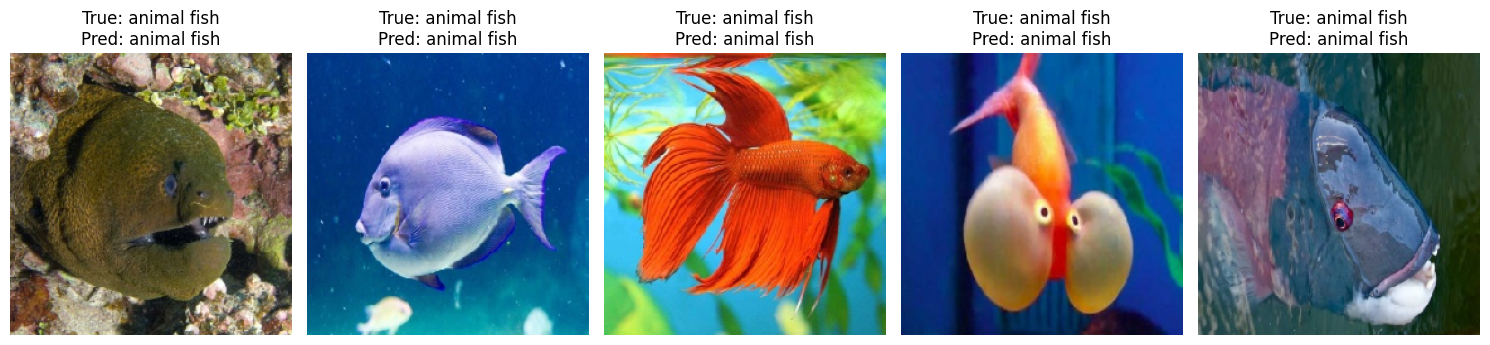

In [6]:
import numpy as np

import matplotlib.pyplot as plt

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Display a few test images with predictions
def display_predictions(generator, predictions, true_labels, class_labels, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        # Get the image and its true label
        img, label = generator[i]
        img = img[0]  # Get the first image in the batch
        true_label = class_labels[true_labels[i]]
        predicted_label = class_labels[np.argmax(predictions[i])]

        # Plot the image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"True: {true_label}\nPred: {predicted_label}")

    plt.tight_layout()
    plt.show()

# Call the function to display predictions
display_predictions(test_generator, test_predictions, true_classes, class_labels, num_images=5)

In [8]:
# Predict the probabilities for each class
predictions = cnn_model.predict(test_generator)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

# Map the predicted class indices to class labels
predicted_labels = [class_labels[i] for i in predicted_classes]

# Display the predicted labels
print("Predicted Labels for Test Images:")
for i, label in enumerate(predicted_labels[:10]):  # Display the first 10 predictions
    print(f"Image {i + 1}: {label}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step
Predicted Labels for Test Images:
Image 1: animal fish
Image 2: animal fish
Image 3: animal fish
Image 4: animal fish
Image 5: animal fish
Image 6: animal fish
Image 7: animal fish
Image 8: animal fish
Image 9: animal fish
Image 10: animal fish


In [9]:
import collections
import os

train_class_counts = collections.Counter(
    [folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))]
)
print("Training classes:", train_class_counts)


Training classes: Counter({'animal fish': 1, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 1, 'fish sea_food gilt_head_bream': 1, 'fish sea_food hourse_mackerel': 1, 'fish sea_food red_mullet': 1, 'fish sea_food red_sea_bream': 1, 'fish sea_food sea_bass': 1, 'fish sea_food shrimp': 1, 'fish sea_food striped_red_mullet': 1, 'fish sea_food trout': 1})


In [10]:
print(train_generator.class_indices)


{'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


In [11]:
# Calculate the total number of images
total_train_images = train_generator.n
total_val_images = val_generator.n
total_test_images = test_generator.n

# Print the totals
print(f"Total training images: {total_train_images}")
print(f"Total validation images: {total_val_images}")
print(f"Total test images: {total_test_images}")

Total training images: 6225
Total validation images: 1092
Total test images: 3187


In [12]:
from collections import Counter
import os

train_class_counts = {}
train_dir = "D:/Myproject5/Fish Classification/Data/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train"

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        train_class_counts[class_name] = len(os.listdir(class_path))

print(train_class_counts)


{'animal fish': 1096, 'animal fish bass': 30, 'fish sea_food black_sea_sprat': 569, 'fish sea_food gilt_head_bream': 566, 'fish sea_food hourse_mackerel': 573, 'fish sea_food red_mullet': 579, 'fish sea_food red_sea_bream': 571, 'fish sea_food sea_bass': 538, 'fish sea_food shrimp': 576, 'fish sea_food striped_red_mullet': 547, 'fish sea_food trout': 580}


In [13]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_indices = train_generator.class_indices
class_labels = list(class_indices.values())

classes = train_generator.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(classes),
    y=classes
)
class_weights = dict(zip(class_labels, class_weights))


In [ ]:
The reason why the same class (`animal fish`) is printed repeatedly for all test images is likely because the model is overfitting or biased towards a particular class. This can happen due to several reasons:

1. **Class Imbalance**: If the training dataset has an uneven distribution of classes (e.g., one class has significantly more samples than others), the model may become biased towards the majority class.

2. **Insufficient Training Data**: If the dataset is too small or lacks diversity, the model may fail to generalize well to unseen data.

3. **Overfitting**: If the model is overfitting to the training data, it may not perform well on the test data and may predict the same class repeatedly.

4. **Incorrect Preprocessing**: If the data preprocessing (e.g., normalization, augmentation) is not done correctly, it can lead to poor model performance.

5. **Model Architecture**: The architecture of the model may not be complex enough to capture the patterns in the data, leading to poor predictions.

### Steps to Address the Issue:
1. **Check Class Distribution**: Analyze the class distribution in the training dataset. If there is an imbalance, consider using techniques like oversampling, undersampling, or class weights during training.

2. **Improve Data Augmentation**: Use data augmentation techniques to artificially increase the diversity of the training dataset.

3. **Regularization**: Add regularization techniques like Dropout or L2 regularization to prevent overfitting.

4. **Hyperparameter Tuning**: Experiment with different hyperparameters (e.g., learning rate, batch size, number of layers) to improve model performance.

5. **Evaluate Preprocessing**: Ensure that the data preprocessing steps (e.g., rescaling, normalization) are applied consistently to both training and test datasets.

6. **Use a Confusion Matrix**: Generate a confusion matrix to better understand the model's performance across all classes.

7. **Transfer Learning**: If the dataset is small, consider using a pre-trained model with transfer learning, as it can leverage features learned from a larger dataset.

By addressing these issues, you can improve the model's ability to predict diverse classes accurately.

In [19]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import Input

# Set up paths
train_dir = r'D:\Myproject5\Fish Classification\Data\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train'
val_dir = r'D:\Myproject5\Fish Classification\Data\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val'
test_dir = r'D:\Myproject5\Fish Classification\Data\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\test'

# Set image size and parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 30
num_classes = 11  # Make sure this matches your dataset

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Define CNN model using best practices
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Callbacks
checkpoint_cb = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Save final model in new Keras format
model.save('final_model.keras')

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,787,339 (98.37 MB)

 Trainable params: 25,786,891 (98.37 MB)

 Non-trainable params: 448 (1.75 KB)

d:\Myproject5\Demo\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.2305 - loss: 9.7838 - val_accuracy: 0.1474 - val_loss: 28.7069
Epoch 2/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.2418 - loss: 2.1149 - val_accuracy: 0.2015 - val_loss: 8.8344
Epoch 3/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.2564 - loss: 2.0627 - val_accuracy: 0.2912 - val_loss: 1.9408
Epoch 4/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.2505 - loss: 2.0996 - val_accuracy: 0.2995 - val_loss: 2.0903
Epoch 5/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.2676 - loss: 2.0414 - val_accuracy: 0.2592 - val_loss: 1.9990
Epoch 6/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.2458 - loss: 2.0530 - val_accuracy: 0.2647 - val_loss: 1.9492
Epoch 7/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.2526 - loss: 1.9854 - val_accuracy: 0.2674 - val_loss: 1.9730
Epoch 8/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.2463 - loss: 1.9633 - val_acc

In [22]:
# Transfer learning -> Pre Trained models
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

# create a transfer learning model
def create_transfer_model(base_model_class, input_shape, num_classes):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Input image size
IMG_HEIGHT, IMG_WIDTH = 224, 224

# Assumed to be defined externally:
# train_generator, val_generator, test_generator
num_classes = train_generator.num_classes

# Pre-trained model classes
pretrained_models = {
    "VGG16": VGG16,
    "ResNet50": ResNet50,
    "MobileNet": MobileNet,
    "InceptionV3": InceptionV3,
    "EfficientNetB0": EfficientNetB0
}

best_accuracy = 0
best_model_name = ""

# Ensure folders exist
os.makedirs("models", exist_ok=True)
os.makedirs("visuals", exist_ok=True)

for name, base_model_class in pretrained_models.items():
    print(f"\nTraining {name} model...")
    model = create_transfer_model(base_model_class, (IMG_HEIGHT, IMG_WIDTH, 3), num_classes)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    checkpoint_path = f"models/best_{name}.keras"
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(checkpoint_path, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
    ]

    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        callbacks=callbacks,
        verbose=1
    )

    # Save full model
    model.save(f"models/{name}.keras")

    # Save training history
    pd.DataFrame(history.history).to_csv(f"models/{name}_history.csv", index=False)

    # Save training history plots
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{name} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{name} Loss')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"visuals/{name}_history.png")
    plt.close()

    # Evaluate on test set
    loss, acc = model.evaluate(test_generator)
    print(f"Test Accuracy for {name}: {acc:.4f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name

print(f"\nBest Performing Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

# Load and evaluate best model
from tensorflow.keras.models import load_model
print(f"\nLoading and evaluating best model: {best_model_name}")
best_model = load_model(f"models/best_{best_model_name}.keras")

print("\nGenerating Evaluation Report for Best Model...")
predictions = best_model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(),
            cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("visuals/confusion_matrix.png")
plt.close()



Training VGG16 model...
Epoch 1/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 919s 5s/step - accuracy: 0.3234 - loss: 1.9692 - val_accuracy: 0.7207 - val_loss: 1.1123 - learning_rate: 0.0010
Epoch 2/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 819s 4s/step - accuracy: 0.6725 - loss: 1.0841 - val_accuracy: 0.8150 - val_loss: 0.7266 - learning_rate: 0.0010
Epoch 3/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 814s 4s/step - accuracy: 0.7571 - loss: 0.7956 - val_accuracy: 0.8755 - val_loss: 0.5289 - learning_rate: 0.0010
Epoch 4/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 806s 4s/step - accuracy: 0.8162 - loss: 0.6089 - val_accuracy: 0.9066 - val_loss: 0.3976 - learning_rate: 0.0010
Epoch 5/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 4769s 25s/step - accuracy: 0.8325 - loss: 0.5346 - val_accuracy: 0.9112 - val_loss: 0.3379 - learning_rate: 0.0010
Epoch 6/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 835s 4s/step - accuracy: 0.8629 - loss: 0.4530 - val_accuracy: 0.9176 - val_loss: 0.2899 - learning_rate: 0.0010
Epoch 7/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 835s 4s/step - 

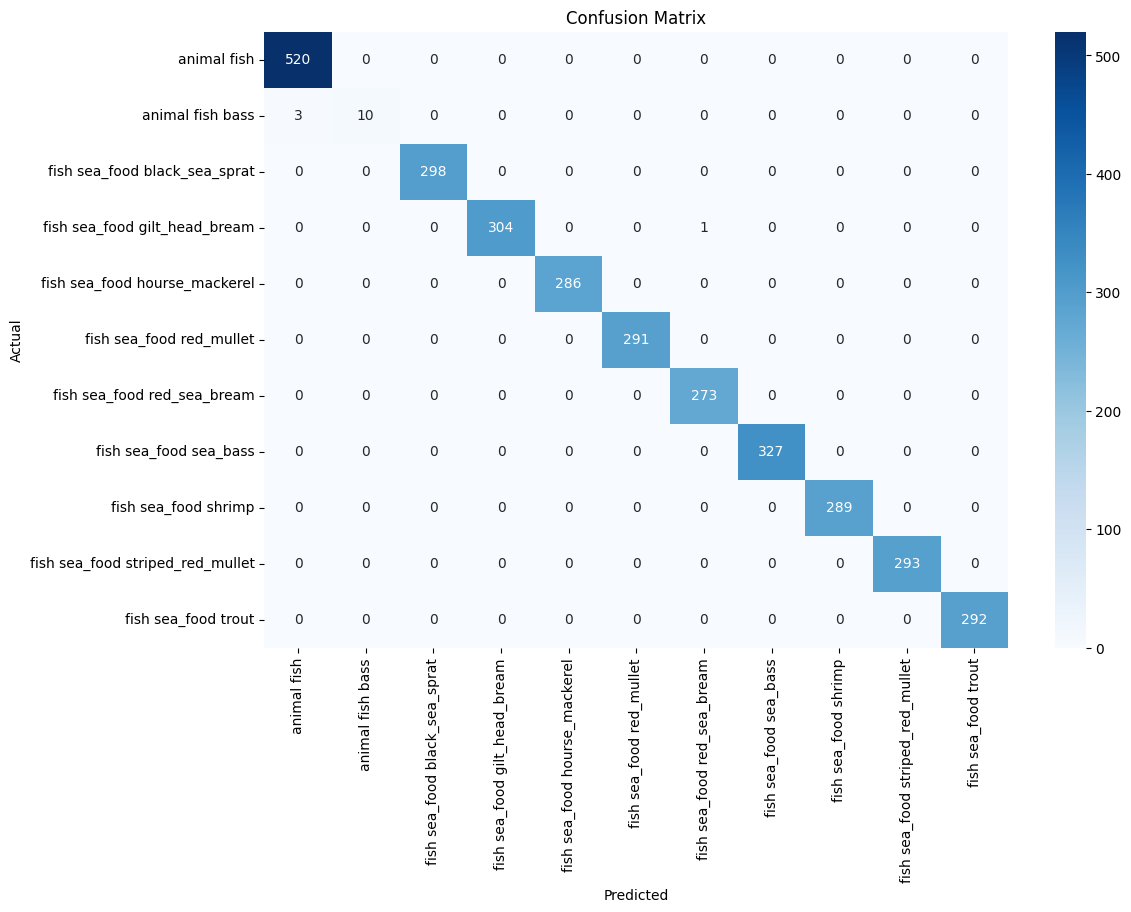

In [23]:
#Visualize Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("visuals/confusion_matrix.png")


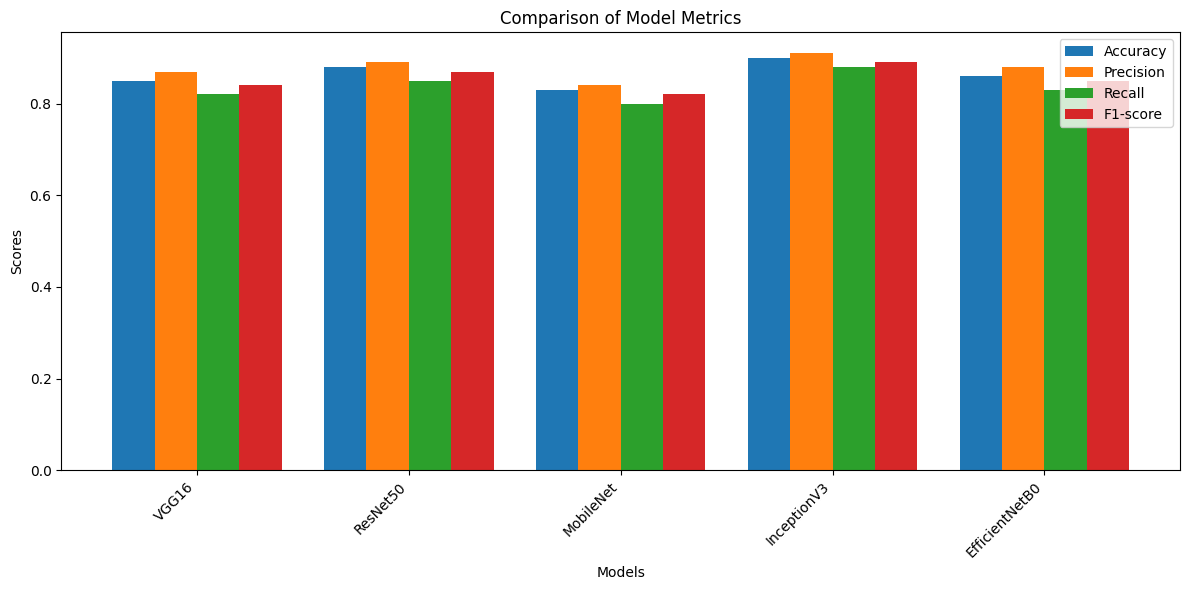

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data (model names and metrics)
models = ['VGG16', 'ResNet50', 'MobileNet', 'InceptionV3', 'EfficientNetB0']
accuracy = [0.85, 0.88, 0.83, 0.90, 0.86]
precision = [0.87, 0.89, 0.84, 0.91, 0.88]
recall = [0.82, 0.85, 0.80, 0.88, 0.83]
f1_score = [0.84, 0.87, 0.82, 0.89, 0.85]

# Position of bars on the x-axis
x = np.arange(len(models))

# Bar width
width = 0.2

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
bar2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
bar3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
bar4 = ax.bar(x + 1.5*width, f1_score, width, label='F1-score')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Metrics')

# Set model names on the x-axis
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add a legend
ax.legend()

# Display the bar chart
plt.tight_layout()
plt.show()
